# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

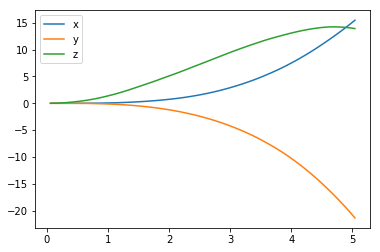

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

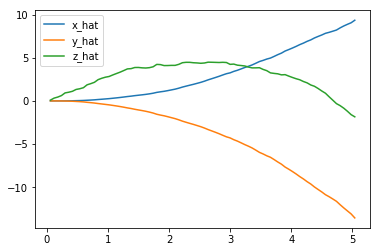

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

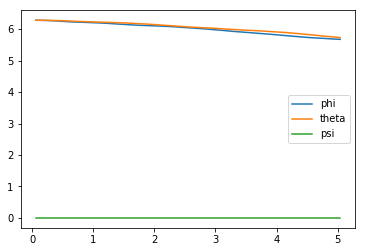

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

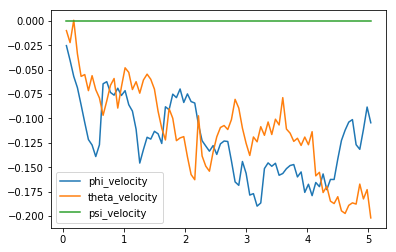

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

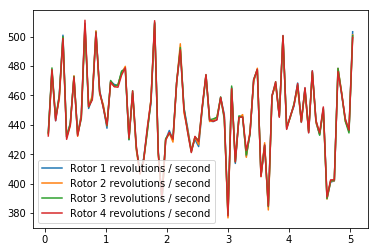

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 15.47244978 -21.3489845   13.91839655   5.67620579   5.73222767
   0.        ]
[  9.34202066 -13.55302726  -1.84299496]
[-0.10442989 -0.20193253  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
%autoreload 2

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
init_pos = np.array([0., 0., 20.])
target_pos = np.array([0., 0., 30.])
task = Task(target_pos=target_pos)
ps_agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = ps_agent.reset_episode() # start a new episode
    while True:
        action = ps_agent.act(state) 
        next_state, reward, done = task.step(action)
        ps_agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, ps_agent.score, ps_agent.best_score, ps_agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   12, score = -300.000 (best = -300.000), noise_scale = 3.25

/home/yoba/udacity/RL-Quadcopter-2/physics_sim.py:114: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/home/yoba/udacity/RL-Quadcopter-2/physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Episode =  500, score = -300.000 (best = -300.000), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [13]:
from agents.agent import DDPG
from monitor import interact

init_pose = np.array([0., 0., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 30.])

num_trials = 1000
task = Task(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
agent = DDPG(task)


episode_rewards, best_reward = interact(task, agent, num_trials)

Using TensorFlow backend.
/home/yoba/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Episode 1/1000 || Reward -680.1327121403476 || Best reward -680.1327121403476 
Quadcopter pose [-2.85935388 -0.84269022  0.        ]
Episode 2/1000 || Reward -584.2719517128397 || Best reward -584.2719517128397 
Quadcopter pose [-2.65546433 -0.7500614   0.        ]
Episode 3/1000 || Reward -675.524926378989 || Best reward -584.2719517128397 
Quadcopter pose [-2.7054718  -0.64047416  0.        ]
Episode 4/1000 || Reward -687.9993116446732 || Best reward -584.2719517128397 
Quadcopter pose [-2.58313502 -0.65421242  0.        ]
Episode 5/1000 || Reward -554.5068973487143 || Best reward -554.5068973487143 
Quadcopter pose [-2.45430522 -0.903253    0.        ]
Episode 6/1000 || Reward -686.9062843762445 || Best reward -554.5068973487143 
Quadcopter pose [ 4.31573545 -1.59646232  0.        ]
Episode 7/1000 || Reward -658.1126152562927 || Best reward -554.5068973487143 
Quadcopter pose [ 1.3338497  -0.39653662  0.       

Episode 60/1000 || Reward -677.6103239907478 || Best reward -411.71204299429724 
Quadcopter pose [-10.54892902  -5.41088323   0.        ]
Episode 61/1000 || Reward -674.5789743468054 || Best reward -411.71204299429724 
Quadcopter pose [-3.19076099 -6.78162136  0.        ]
Episode 62/1000 || Reward -468.33448500519376 || Best reward -411.71204299429724 
Quadcopter pose [-2.04930645  1.49819458  0.        ]
Episode 63/1000 || Reward -711.4103043182367 || Best reward -411.71204299429724 
Quadcopter pose [ 5.19072221 -2.33257425  0.        ]
Episode 64/1000 || Reward -563.5397634350427 || Best reward -411.71204299429724 
Quadcopter pose [-5.67601502 -3.78804219  0.        ]
Episode 65/1000 || Reward -580.4110264459962 || Best reward -411.71204299429724 
Quadcopter pose [ 8.78157346 -1.71431728  0.        ]
Episode 66/1000 || Reward -601.7902728335696 || Best reward -411.71204299429724 
Quadcopter pose [-6.05114554  0.88284391  0.        ]
Episode 67/1000 || Reward -641.0283418163579 || Bes

Episode 121/1000 || Reward -603.754939347843 || Best reward 366.0819517666527 
Quadcopter pose [-0.07367617 -2.00205564  0.        ]
Episode 122/1000 || Reward -390.9748235020094 || Best reward 366.0819517666527 
Quadcopter pose [-0.1388019  -1.63006898  0.        ]
Episode 123/1000 || Reward -604.2556854481452 || Best reward 366.0819517666527 
Quadcopter pose [-0.05692574 -0.68883738  0.        ]
Episode 124/1000 || Reward -616.6922809823203 || Best reward 366.0819517666527 
Quadcopter pose [-0.16519219 -2.51933697  0.        ]
Episode 125/1000 || Reward -507.69883527317273 || Best reward 366.0819517666527 
Quadcopter pose [-0.11660296 -1.65615686  0.        ]
Episode 126/1000 || Reward -391.35252808295155 || Best reward 366.0819517666527 
Quadcopter pose [-0.15530095 -1.63540152  0.        ]
Episode 127/1000 || Reward -388.41572088596104 || Best reward 366.0819517666527 
Quadcopter pose [ 0.01068054 -2.49949611  0.        ]
Episode 128/1000 || Reward -371.8168679455497 || Best reward

Episode 183/1000 || Reward -515.0942866483546 || Best reward 366.0819517666527 
Quadcopter pose [15.43288834 -0.56958128  0.        ]
Episode 184/1000 || Reward -940.1852452912021 || Best reward 366.0819517666527 
Quadcopter pose [-22.45674872 -15.33389452   0.        ]
Episode 185/1000 || Reward 418.84473341270336 || Best reward 418.84473341270336 
Quadcopter pose [-8.57426556  3.12944736 13.83959518]
Episode 186/1000 || Reward -738.2322592064086 || Best reward 418.84473341270336 
Quadcopter pose [-36.54425592 -15.12552203   0.        ]
Episode 187/1000 || Reward -752.4844546672205 || Best reward 418.84473341270336 
Quadcopter pose [-47.04402591   0.71148142   0.        ]
Episode 188/1000 || Reward -586.2882018882012 || Best reward 418.84473341270336 
Quadcopter pose [-38.97417763  -2.58102393   0.        ]
Episode 189/1000 || Reward -626.7568314879142 || Best reward 418.84473341270336 
Quadcopter pose [-41.87850409   0.36556558   0.        ]
Episode 190/1000 || Reward -666.9712153060

Episode 243/1000 || Reward -717.4986050142298 || Best reward 418.84473341270336 
Quadcopter pose [-11.82819404  -2.47090986   0.        ]
Episode 244/1000 || Reward -512.4599383831259 || Best reward 418.84473341270336 
Quadcopter pose [-10.95866754  -3.23832721   0.        ]
Episode 245/1000 || Reward -720.5827772147668 || Best reward 418.84473341270336 
Quadcopter pose [-10.68690989  -2.36658759   0.        ]
Episode 246/1000 || Reward -508.77643934725677 || Best reward 418.84473341270336 
Quadcopter pose [-11.15194703  -2.28252241   0.        ]
Episode 247/1000 || Reward -648.1531629133777 || Best reward 418.84473341270336 
Quadcopter pose [-9.18976784 -2.1817712   0.        ]
Episode 248/1000 || Reward -533.9088632631751 || Best reward 418.84473341270336 
Quadcopter pose [-8.58941576 -0.51598051  0.        ]
Episode 249/1000 || Reward -535.8532622214716 || Best reward 418.84473341270336 
Quadcopter pose [-8.5832114  -1.42322833  0.        ]
Episode 250/1000 || Reward -558.2828236911

Episode 304/1000 || Reward 394.23977814008856 || Best reward 418.84473341270336 
Quadcopter pose [38.99581166 80.81077927 36.21152238]
Episode 305/1000 || Reward 384.6837821720463 || Best reward 418.84473341270336 
Quadcopter pose [ 28.49946446 104.03032743  25.69099713]
Episode 306/1000 || Reward -150.09048378475046 || Best reward 418.84473341270336 
Quadcopter pose [  3.09112428 133.67856474   0.        ]
Episode 307/1000 || Reward 392.99646097820107 || Best reward 418.84473341270336 
Quadcopter pose [ 10.84509327 130.89461975  32.28806406]
Episode 308/1000 || Reward 310.2229815352246 || Best reward 418.84473341270336 
Quadcopter pose [  3.66519207 138.55655378  15.65234613]
Episode 309/1000 || Reward -232.7406319327958 || Best reward 418.84473341270336 
Quadcopter pose [  2.60598026 146.17647743   0.        ]
Episode 310/1000 || Reward 374.32997723358085 || Best reward 418.84473341270336 
Quadcopter pose [ 1.20451439 84.62889419 34.57495027]
Episode 311/1000 || Reward -77.9239266480

Episode 363/1000 || Reward 399.3793771900825 || Best reward 645.5206756364574 
Quadcopter pose [4.67616004e-03 7.94994074e+01 4.44385030e+01]
Episode 364/1000 || Reward 618.654410831441 || Best reward 645.5206756364574 
Quadcopter pose [2.49678520e-03 1.01469876e+01 9.25699643e+01]
Episode 365/1000 || Reward 735.780304011335 || Best reward 735.780304011335 
Quadcopter pose [-5.99860922e-04  4.11538215e+01  7.70049986e+01]
Episode 366/1000 || Reward 820.3641116545405 || Best reward 820.3641116545405 
Quadcopter pose [-3.22525413e-03  2.31783998e+01  8.82543424e+01]
Episode 367/1000 || Reward 845.7587625589928 || Best reward 845.7587625589928 
Quadcopter pose [-2.52786379e-02  1.69105285e+01  9.02161073e+01]
Episode 368/1000 || Reward 686.5978455220423 || Best reward 845.7587625589928 
Quadcopter pose [-3.69150799e-04  6.10385015e+01  5.66021671e+01]
Episode 369/1000 || Reward 638.206301519258 || Best reward 845.7587625589928 
Quadcopter pose [-6.61468487e-04  4.63849680e+01  7.30258114e

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

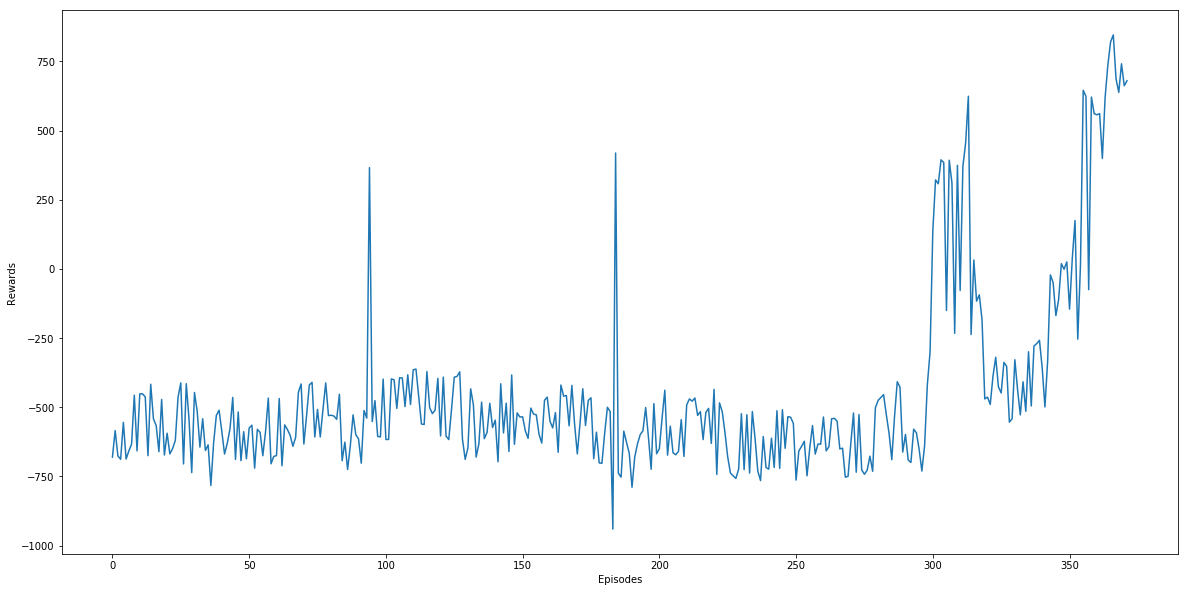

In [14]:
from monitor import plot_rewards

plot_rewards(episode_rewards)

## Run sample eposide and observe agent's behavior

In [15]:
from monitor import run_sample_task

runtime=5.
init_velocities = np.array([0., 0., 0.])        
init_angle_velocities = np.array([0., 0., 0.])  
init_pose = np.array([0., 0., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 30.])

task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)

results = run_sample_task(agent, task)


Total episode reward : 812.7495886262426


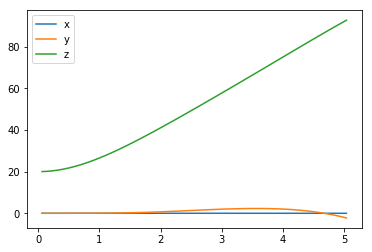

In [16]:
from monitor import plot_position

plot_position(results)

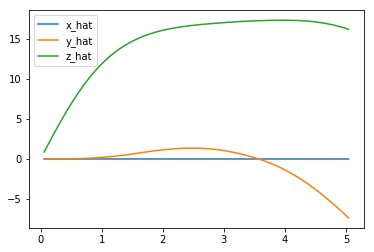

In [17]:
from monitor import plot_velocity

plot_velocity(results)

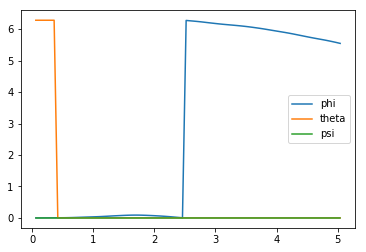

In [18]:
from monitor import plot_euler_angles

plot_euler_angles(results)

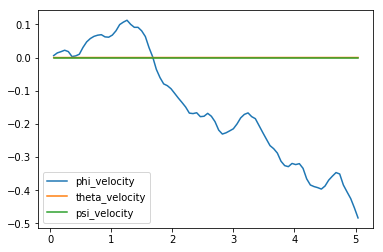

In [19]:
from monitor import plot_euler_angles_velocities

plot_euler_angles_velocities(results)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I've decided to teach quadcopter to take off. 
There were a lot of reward function options before I've found the final solution (which is not quite perfect, but it's the most efficient among the all I've tried). 
The most important source of inspiration was [this](https://www.bons.ai/blog/reward-functions-reinforcement-learning-video) article. 
The main requirements for the takeoff task are:
- The agent should flight as high as he can, but it shouldn't crash.
- The agent should stick to more or less stable x and y position, avoid large deviations from target x and y.
- The agent shouldn't rotate much, and its position in the space should be stable during taking off. 
- The agent's z position shouldn't be lower the target. 

So the primary strategy was:
- Huge penalty for crashes.
- The reward for reaching a target or higher.
- Penalty for getting lower than a target position. 
- Penalty for deviations from x and y position.
- Penalty for higher Euler angles. 

I wanted the reward for flying higher to increase gradually, so I've chosen the function: `1. - (curr_distance / max_distance) ** 0.4`. The graph below illustrates how does the reward changes depending on z position. 

After the agent reaches target height and higher, I'm encouraging it with constant reward instead of graduate.  

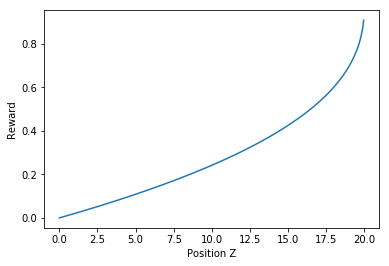

In [26]:
import math 
import matplotlib.pyplot as plt
%matplotlib inline

reward_function_z = lambda pose, target_pos: 1. - (np.abs(target_pos - pose) / 20.) **0.4

values = np.arange(0., 20., 0.05)
target_pos = 20.

plt.plot(values, reward_function_z(values, target_pos))
plt.xlabel("Position Z")
plt.ylabel("Reward")
plt.show()

The same function was used to calculate the penalty for descent below the target. 

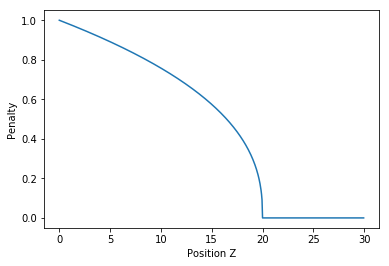

In [11]:
getting_lower_penalty = lambda pose, initial_pos:(abs(min(pose - initial_pos, 0))/initial_pos)**0.4
values = np.arange(0., 30., 0.05)
initial_pos = 20.

penalties = [getting_lower_penalty(p, initial_pos) for p in values]
plt.plot(values, penalties)
plt.xlabel("Position Z")
plt.ylabel("Penalty")
plt.show()

I didn't want to punish much for x and y deviations, so I've introduced the tolerable deviation range, which is not punished much. It's demonstrated at the heatmap below.

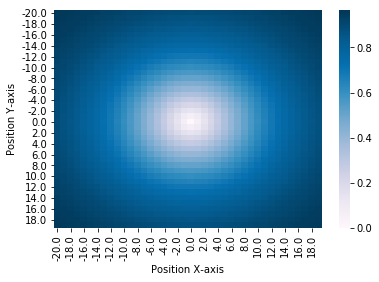

In [12]:
import seaborn as sns
%matplotlib inline


def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R


eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
tolerable_xy_dev = eucl_distance([0., 0.], [10., 10.])
penalty_function_xy = lambda pose, target_pos: np.tanh(eucl_distance(pose, target_pos) / tolerable_xy_dev)

x_range = np.round(np.arange(-20., 20., 1), 2)
y_range = np.round(np.arange(-20., 20., 1), 2)
target_pos = np.array([0., 0.])

R = map_function(penalty_function_xy, x_range, y_range, target_pos)

ax = sns.heatmap(R, cmap="PuBu")
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Y-axis")
plt.show()


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I've decided to use the provided DDPG algorithm and changed a few things. 
It didn't worked at first at all, so I've changed actors and critics neural networks sizes many times, but the agent seemed not be learning at all. 
But after a while I've realised that the main problem was the reward function, so I've focused on it. 
I've changed only few hyperparameters of provided agent: 

``
self.batch_size = 128
self.gamma = 0.90  # discount factor
self.tau = 0.003  # for soft update of target parameters
``

I've also added batch normalization and dropout to both actor and critic models. Also I've added more layers to combined critic model. 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

That was by far the most challenging project I've had during this Nanodegree. 
The hardest was the beginning, when I didn't even know where to start and what to do. And even after I've started trying, nothing worked. It was really frustrating and time-consuming. However, despite all the complexity, I've gained a lot of really useful practice and experience. 

There are few interesting observations about take off task: 
1. The better results are achieved if the agents starts the episode not from the ground, but somewhere in the air. It makes episodes longer, especially at the beginning of learning, so agent could gain more experience, which would be impossible if it started from the ground due to high crash rate. 
2. I've tried to end episode right after agent reaches target (rewarding it with 100. reward). At first, during learning agent was behaving as expected: reached target and ended episode. But after that it somehow figured out, that it's more 'profitable' to avoid episode ending, and flyed somewhere in between the surface and the target until timeout😃 I thought such behavior was caused by disbalance between rewards for reaching the target and for approaching it, but after some more long unsuccessful experiments I've dropped the idea of episode termination. (Probably it could work after more tuning). 
